In [108]:
import numpy as np
from qiskit import Aer, QuantumCircuit, transpile, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [109]:
qc = QuantumCircuit(4)
qc.cz(0, 3)
qc.cz(1, 3)
# qc.cz(2, 3)
oracle = qc.to_gate()
oracle.name = "omega"

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [110]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
        
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
        
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
        
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    
    qc.draw()
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "amplification"
    
    return U_s

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [111]:
n = 4
grover_circuit = QuantumCircuit(n)
grover_cicuit = initialize_s(grover_circuit, [0,1,2,3])
grover_circuit.append(oracle, [0,1,2,3])
grover_circuit.append(diffuser(n), [0,1,2,3])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌────────┐┌────────────────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0       ├┤0               ├─░─┤M├─────────
        ├───┤│        ││                │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1       ├┤1               ├─░──╫─┤M├──────
        ├───┤│  omega ││  amplification │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2       ├┤2               ├─░──╫──╫─┤M├───
        ├───┤│        ││                │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3       ├┤3               ├─░──╫──╫──╫─┤M├
        └───┘└────────┘└────────────────┘ ░  ║  ║  ║ └╥┘
meas_0: ═════════════════════════════════════╩══╬══╬══╬═
                                                ║  ║  ║ 
meas_1: ════════════════════════════════════════╩══╬══╬═
                                                   ║  ║ 
meas_2: ═══════════════════════════════════════════╩══╬═
                                                      ║ 
meas_3: ══════════════════════════════════════════════╩═

{'1110': 518, '1001': 534, '1101': 530, '1010': 466}


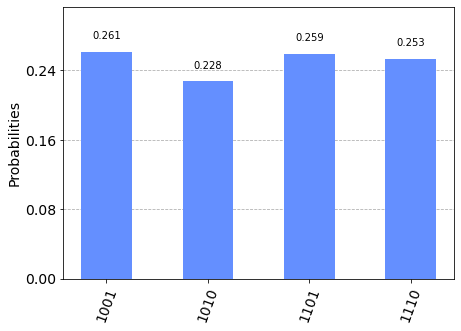

In [114]:
# use local simulator
aer_sim = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, aer_sim, shots=2048)
results = job.result()
counts = results.get_counts(grover_circuit)
print(counts)
plot_histogram(counts)

In [115]:
nqubits = 3
qc = QuantumCircuit(nqubits)
    
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(nqubits):
    qc.h(qubit)
        
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(nqubits):
    qc.x(qubit)
        
# Do multi-controlled-Z gate
qc.h(nqubits-1)
qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
qc.h(nqubits-1)
    
# Apply transformation |11..1> -> |00..0>
for qubit in range(nqubits):
    qc.x(qubit)
        
# Apply transformation |00..0> -> |s>
for qubit in range(nqubits):
    qc.h(qubit)
    
qc.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘